In [9]:
import requests
from bs4 import BeautifulSoup
import csv

#a list of url IDs for each movie genres, with the matching filename and the number of pages the list contains
genres = ['ls051689121','ls051689339','ls051689462','ls051217367','ls051689627','ls051689930','ls051688145','ls051689802','ls051689886']
genretitle = ['adventure.csv','crime.csv','fantasy.csv', 'documentary.csv','dramas.csv','sport.csv','thriller.csv','war.csv']
pages = [14,17,11,16,48,11,10,28,11]

#loop through the movie genres
for z in range(8):
    with open(genretitle[z], 'w') as csvfile:
        print(genretitle[z])
        csvwr = csv.writer(csvfile)
        
        #loop through the pages in each movie genres list
        for i in range(pages[z]):
            #get the html file of the page, and create a BeautifulSoup object out of it
            url = 'https://www.imdb.com/list/' + genres[z] + '/?sort=list_order,asc&st_dt=&mode=detail&page=' + str(i+1)
            print(url)
            html = requests.get(url).text
            soup = BeautifulSoup(html, 'html.parser').findAll('div', class_='lister-item-content')
            
            for i in soup:
                #retrieve the title and year of release of each movie in the list
                title = i.a.text
                year = i.find('span', class_='lister-item-year text-muted unbold').text
                
                #clean the year text of special characters
                year = ''.join(i for i in year if i.isdigit())
                
                #write the movie title and year of release in a csv file
                csvwr.writerow([title, year])


adventure.csv
https://www.imdb.com/list/ls051689121/?sort=list_order,asc&st_dt=&mode=detail&page=1
https://www.imdb.com/list/ls051689121/?sort=list_order,asc&st_dt=&mode=detail&page=2
https://www.imdb.com/list/ls051689121/?sort=list_order,asc&st_dt=&mode=detail&page=3
https://www.imdb.com/list/ls051689121/?sort=list_order,asc&st_dt=&mode=detail&page=4
https://www.imdb.com/list/ls051689121/?sort=list_order,asc&st_dt=&mode=detail&page=5
https://www.imdb.com/list/ls051689121/?sort=list_order,asc&st_dt=&mode=detail&page=6
https://www.imdb.com/list/ls051689121/?sort=list_order,asc&st_dt=&mode=detail&page=7
https://www.imdb.com/list/ls051689121/?sort=list_order,asc&st_dt=&mode=detail&page=8
https://www.imdb.com/list/ls051689121/?sort=list_order,asc&st_dt=&mode=detail&page=9
https://www.imdb.com/list/ls051689121/?sort=list_order,asc&st_dt=&mode=detail&page=10
https://www.imdb.com/list/ls051689121/?sort=list_order,asc&st_dt=&mode=detail&page=11
https://www.imdb.com/list/ls051689121/?sort=list_

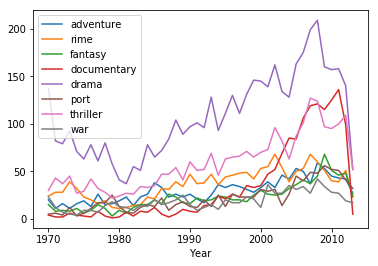

In [131]:
import pandas as pd
import matplotlib as plt

genretitle1 = ['adventure.csv','crime.csv','fantasy.csv', 'documentary.csv','dramas.csv','sport.csv','thriller.csv','war.csv']

#loop through all datasets, clean and plot
for i in genretitle1:
    df = pd.read_csv(i, names=['Title', 'Year'], encoding='latin1')
    df = df[df['Year'] <= 2013]
    df = df[df['Year'] >= 1970]
    df = df.groupby('Year').size()
    df.plot(label = str(i).strip('.csv'), legend = True)